In [9]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from astroLuSt.preprocessing import binning, dataseries_manipulation, pdm, sigmaclipping

import importlib
importlib.reload(binning)
importlib.reload(dataseries_manipulation)
importlib.reload(pdm)
importlib.reload(sigmaclipping)

<module 'astroLuSt.preprocessing.sigmaclipping' from 'c:\\Users\\lukas\\Documents\\GitHub\\astroLuSt\\demos\\..\\astroLuSt\\preprocessing\\sigmaclipping.py'>

# Generate (periodic) time-series

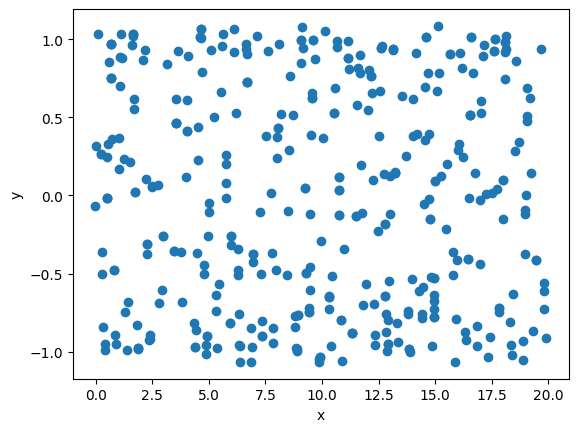

In [10]:
p = 0.5
x = np.linspace(0,20,1000)
x += np.random.normal(size=x.shape)*0.05
y = np.sin(x*2*np.pi/0.5)  + np.random.normal(size=x.shape)*0.05

#randomly sample from x and y
randidxs = np.random.choice(np.arange(0, x.shape[0], 1), size=400)

x = x[randidxs]
y = y[randidxs]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()


# Phase Dispersion Minimization

PDM(
    period_start=0.1,
    period_stop=1.4,
    nperiods=100,
    trial_periods=None,
    n_retries=5,
    nperiods_retry=50,
    retry_range=0.1,
    tolerance_expression=*1.01,
    tolerance_decay=0.99,
    breakloop=False,
    variance_mode=interval,
    sort_output_by=periods,
    normalize=False,
    n_jobs=1,
    verbose=3,
    **{'nintervals': 30},
)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
c:\Users\lukas\AppData\Local\Programs\Python\Python310\venvs\astrolust\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s re

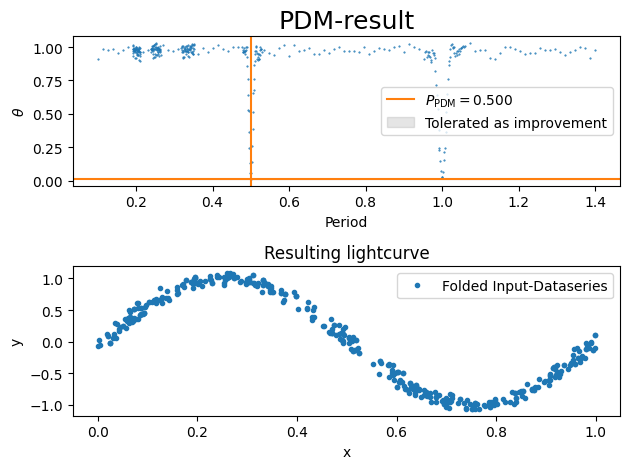

In [11]:


pdm_est = pdm.PDM(
    period_start=0.1, period_stop=1.4, nperiods=100,
    # trial_periods=np.array([0.5, 1, 0.333]),
    nintervals=30,
    n_retries=5,
    tolerance_expression='*1.01',
    tolerance_decay=0.99,
    nperiods_retry=50,
    breakloop=False,
    n_jobs=1,
    verbose=3
)

print(pdm_est)

pdm_est.fit_predict(x, y)
# pdm.fit(x, y)

fig, axs = pdm_est.plot_result()

# Data Binning

## Fixed number of bins

INFO: Generated 5 bins


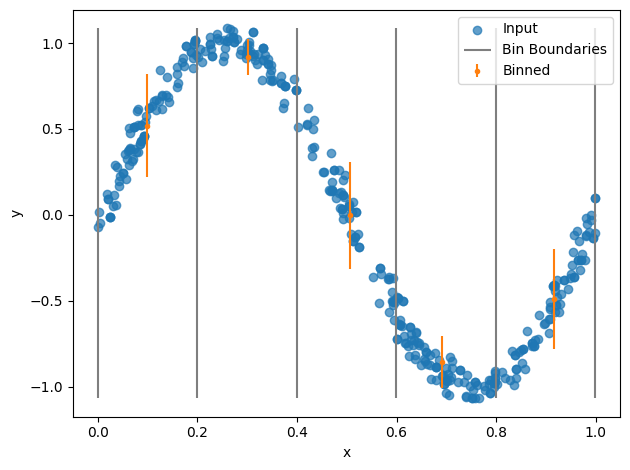

In [12]:
bng = binning.Binning(
    nintervals=5, npoints_per_interval=None,
    xmin=None, xmax=None,
    ddof=0,
    verbose=3
)

x_binned, y_binned, y_std = bng.bin_curve(
    pdm_est.best_fold_x, pdm_est.best_fold_y
)

fig, axs = bng.plot_result(
    pdm_est.best_fold_x, pdm_est.best_fold_y,
    x_binned, y_binned, y_std
)

## Fixed number of bins (fraction of dataseries length)

INFO: Generated 40 bins


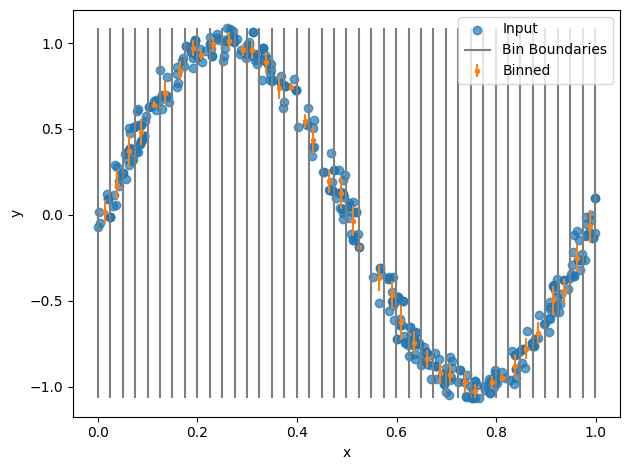

In [13]:
bng = binning.Binning(
    nintervals=0.1, npoints_per_interval=None,
    xmin=None, xmax=None,
    ddof=0,
    verbose=3
)

x_binned, y_binned, y_std = bng.bin_curve(
    pdm_est.best_fold_x, pdm_est.best_fold_y
)

fig, axs = bng.plot_result(
    pdm_est.best_fold_x, pdm_est.best_fold_y,
    x_binned, y_binned, y_std
)

## Fixed number of datapoints per bin

INFO: Generated 14 bins


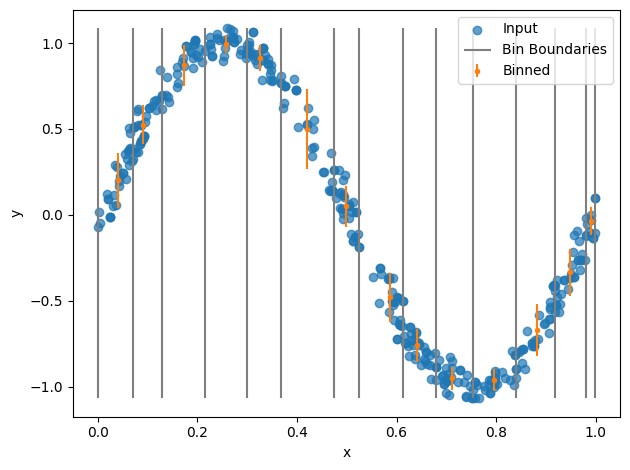

In [14]:
bng = binning.Binning(
    nintervals=5, npoints_per_interval=30,
    xmin=None, xmax=None,
    ddof=0,
    verbose=3
)

x_binned, y_binned, y_std = bng.bin_curve(
    pdm_est.best_fold_x, pdm_est.best_fold_y
)

fig, axs = bng.plot_result(
    pdm_est.best_fold_x, pdm_est.best_fold_y,
    x_binned, y_binned, y_std
)

# Sigma Clipping

INFO: Calculating mean-curve because one of 'mean_x', 'mean_y', std_y' is None!
INFO: Generated 40 bins


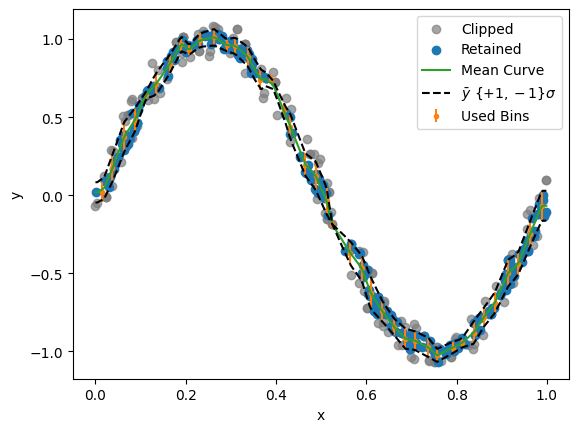

In [15]:
sigclip = sigmaclipping.SigmaClipping(
    pdm_est.best_fold_x, pdm_est.best_fold_y,
    mean_x=None, mean_y=None, std_y=None,
    sigma_bottom=1, sigma_top=1,
    verbose=3
)

clip_mask = sigclip.clip_curve()

fig, axs = sigclip.plot_result()